In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df=pd.read_csv("D:\covid19\corona_data\covid_19_india.csv")
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
2769,2770,07/06/20,8:00 AM,Tripura,-,-,173,0,747
2770,2771,07/06/20,8:00 AM,Uttarakhand,-,-,423,11,1303
2771,2772,07/06/20,8:00 AM,Uttar Pradesh,-,-,5648,257,9733
2772,2773,07/06/20,8:00 AM,West Bengal,-,-,3119,383,7738


In [3]:
df.drop("Time",axis=1,inplace=True)
df.drop("ConfirmedForeignNational",axis=1,inplace=True)
df.rename(columns={"State/UnionTerritory":"state"},inplace=True)
df.drop("ConfirmedIndianNational",axis=1,inplace=True)
df.drop("Sno",axis=1,inplace=True)

In [4]:
df

,Date,state,Cured,Deaths,Confirmed
0,30/01/20,Kerala,0,0,1
1,31/01/20,Kerala,0,0,1
2,01/02/20,Kerala,0,0,2
3,02/02/20,Kerala,0,0,3
4,03/02/20,Kerala,0,0,3
...,...,...,...,...,...
2769,07/06/20,Tripura,173,0,747
2770,07/06/20,Uttarakhand,423,11,1303
2771,07/06/20,Uttar Pradesh,5648,257,9733
2772,07/06/20,West Bengal,3119,383,7738


In [5]:
df.drop("Cured",axis=1,inplace=True)
df.drop("Deaths",axis=1,inplace=True)

In [6]:
l=df[df["state"]=="Kerala"]["Date"]
x=list(df[df["state"]=="Kerala"]["Confirmed"])

In [7]:
c={"kerala":pd.Series(x,index=list(l))}

In [8]:
d=pd.DataFrame(c)

In [9]:
d["Andhra"]=pd.Series(list(df[df["state"]=="Andhra Pradesh"]["Confirmed"]),index=list(df[df["state"]=="Andhra Pradesh"]["Date"]))

In [10]:
d["Telangana"]=pd.Series(list(df[df["state"]=="Telengana"]["Confirmed"]),index=list(df[df["state"]=="Telengana"]["Date"]))
d["Karnataka"]=pd.Series(list(df[df["state"]=="Karnataka"]["Confirmed"]),index=list(df[df["state"]=="Karnataka"]["Date"]))
d["Tamil Nadu"]=pd.Series(list(df[df["state"]=="Tamil Nadu"]["Confirmed"]),index=list(df[df["state"]=="Tamil Nadu"]["Date"]))

In [11]:
d

,kerala,Andhra,Telangana,Karnataka,Tamil Nadu
30/01/20,1,NaN,NaN,NaN,NaN
31/01/20,1,NaN,NaN,NaN,NaN
01/02/20,2,NaN,NaN,NaN,NaN
02/02/20,3,NaN,NaN,NaN,NaN
03/02/20,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...
03/06/20,1412,3898.0,2891.0,3796.0,24586.0
04/06/20,1494,4080.0,3020.0,4063.0,25872.0
05/06/20,1588,4223.0,3147.0,4320.0,27256.0
06/06/20,1699,4303.0,3290.0,4835.0,28694.0


In [12]:
s=d.loc["05/06/20"]

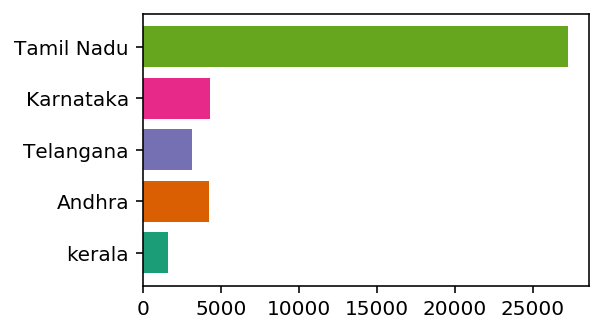

In [13]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2(range(5))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

In [14]:
d.index.name="date"
d

,kerala,Andhra,Telangana,Karnataka,Tamil Nadu
date,,,,,
30/01/20,1,NaN,NaN,NaN,NaN
31/01/20,1,NaN,NaN,NaN,NaN
01/02/20,2,NaN,NaN,NaN,NaN
02/02/20,3,NaN,NaN,NaN,NaN
03/02/20,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...
03/06/20,1412,3898.0,2891.0,3796.0,24586.0
04/06/20,1494,4080.0,3020.0,4063.0,25872.0
05/06/20,1588,4223.0,3147.0,4320.0,27256.0


In [15]:
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(d)
df_rank_expanded.head()

,kerala,Andhra,Telangana,Karnataka,Tamil Nadu
date,,,,,
30/01/20,1.0,NaN,NaN,NaN,NaN
30/01/20,1.0,NaN,NaN,NaN,NaN
30/01/20,1.0,NaN,NaN,NaN,NaN
30/01/20,1.0,NaN,NaN,NaN,NaN
30/01/20,1.0,NaN,NaN,NaN,NaN


In [24]:
 from datetime import datetime

In [18]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

In [34]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors,tick_label=df_expanded.columns)
    date_str = df_expanded.index[i]
    ax.set_title(f'COVID-19 confirmed cases south_India" - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [35]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)


In [37]:
anim.save('covid191.mp4')